# Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)

In [1]:
import os

data = './data'
dir_list = os.listdir(data)

## Peek into the data

### Waveplot

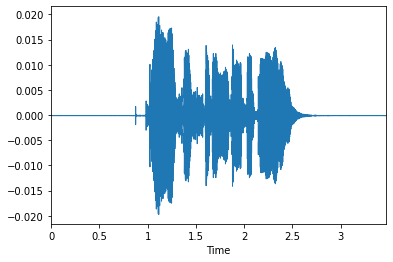

In [2]:
import librosa 
import librosa.display 

y, sr = librosa.load('./data/03-01-01-01-02-01-18.wav')

librosa.display.waveplot(y, sr=sr)

### Fourier transform

#### One short time window

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fourier_transform = np.abs(librosa.stft(y[:2048], n_fft = 2048, hop_length = 2048 + 1))
plt.plot(fourier_transform)

#### Each time window

In [ ]:
diagram = np.abs(librosa.stft(y, n_fft = 2048, hop_length = 512))
diagram = librosa.core.amplitude_to_db(diagram, ref=np.max)
librosa.display.specshow(diagram, sr = sr, x_axis = 'time', y_axis = 'linear')
plt.colorbar(format = '%+2.0f dB')

### Label the data 

In [3]:
emotion_identifiers = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

statement_identifiers = {'01': 'kids are talking by the door', '02': 'dogs are sitting by the door'}

emotional_intensity_identifiers = {'01': 'normal', '02': 'strong'}

items = []

# Features
emotional_intensity = []
statement = []
gender = []

# Labels
label = []

for item in dir_list:
    if item.endswith('.wav'):
        items.append(item)
        item = item[:-4]
        identifiers = item.split('-')

         # Find emotional intensity 
        emotional_intensity.append(emotional_intensity_identifiers[identifiers[3]])

        # Find statement
        statement.append(statement_identifiers[identifiers[4]])

        # Find gender 
        if (int(identifiers[6]) % 2) == 0:
            gender.append('female')
        else: 
            gender.append('male')

        # Find emotion label
        label.append(emotion_identifiers[identifiers[2]])

In [4]:
import pandas as pd 

data = {'item': items, 'emotional intensity': emotional_intensity, 'statement': statement, 'gender': gender, 'label': label}
df = pd.DataFrame(data = data)

## Feature Extraction

In [13]:
import librosa 

time_series = []
sample_rates = []

for item in items: 
    path = './data/' + item

    x, sample_rate = librosa.load(path)
    time_series.append(x)
    sample_rates.append(sample_rate)

In [29]:
df['time series'] = time_series
df['time series'] = df['time series']
df['sample rate'] = sample_rates

##### Spectral centroid

The spectral centroid indicates where the center of mass of the spectrum is located. 

The spectral centroid is calculated as the weighted mean of the frequencies that are present in a signal, determined using a Forier transform, with the magnitutes as weights. 

$$
\text{Centroid} = \frac{\sum_{n=0}^{N-1}f(n)x(n)}{\sum_{n=0}^{N-1}x(n)}
$$

In [33]:
spectral_centroids = []

for index, y in enumerate(time_series): 
    spectral_centroids.append(librosa.feature.spectral_centroid(y, sr = sample_rates[index]))

df['spectral centroid'] = spectral_centroids

### Mel Spectrogram 

The Mel scale is a non-linear transformation of the frequency scale. 

The scale is based on the perception of pitches. The pitches within a frequency are judged when listeners are of equal distance from one another. 



In [36]:
mel_spectrogram = []

spectral_centroids = []

for index, y in enumerate(time_series): 
    mel_spectrogram.append(librosa.feature.melspectrogram(y, sr = sample_rates[index]))

df['mel spectrogram'] = mel_spectrogram

### Mel-frequency cepstral coefficients (MFCCs)

In [37]:
mfccs = []

for index, y in enumerate(time_series):
    mfccs.append(librosa.feature.mfcc(y , sr = sample_rates[index]))

df['mfcc'] = mfccs

## Create the model

In [8]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

model = kerals.Sequential()

1440
(1440, 5)


In [11]:
count = 0
for item in items:
    count +=1
    print(item)

print(count)

-06-01-02-01-09.wav
03-01-05-01-02-02-09.wav
03-01-05-02-01-02-09.wav
03-01-06-02-01-01-09.wav
03-01-06-02-01-01-21.wav
03-01-08-02-02-02-23.wav
03-01-05-02-01-02-21.wav
03-01-02-02-01-02-19.wav
03-01-03-01-02-01-05.wav
03-01-03-01-02-01-11.wav
03-01-07-01-02-02-15.wav
03-01-04-01-02-01-01.wav
03-01-07-01-02-02-01.wav
03-01-04-01-02-01-15.wav
03-01-07-02-01-02-01.wav
03-01-04-02-01-01-15.wav
03-01-07-02-01-02-15.wav
03-01-04-02-01-01-01.wav
03-01-03-02-01-01-11.wav
03-01-03-02-01-01-05.wav
03-01-04-01-01-01-09.wav
03-01-07-01-01-02-09.wav
03-01-07-01-01-02-21.wav
03-01-03-01-01-01-19.wav
03-01-04-01-01-01-21.wav
03-01-04-02-02-01-21.wav
03-01-03-02-02-01-19.wav
03-01-07-02-02-02-21.wav
03-01-07-02-02-02-09.wav
03-01-04-02-02-01-09.wav
03-01-04-02-02-01-08.wav
03-01-07-02-02-02-08.wav
03-01-03-02-02-01-24.wav
03-01-07-02-02-02-20.wav
03-01-03-02-02-01-18.wav
03-01-04-02-02-01-20.wav
03-01-04-01-01-01-20.wav
03-01-03-01-01-01-18.wav
03-01-07-01-01-02-20.wav
03-01-03-01-01-01-24.wav
03-01

In [21]:
df

,item,emotional intensity,statement,gender,label,time series,samle rate,sample rate
0,03-01-06-01-02-02-02.wav,normal,dogs are sitting by the door,female,fearful,"[-5.293641e-07, 5.2245684e-07, -4.836706e-07, ...",22050,22050
1,03-01-05-01-02-01-16.wav,normal,dogs are sitting by the door,female,angry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,22050
2,03-01-08-01-01-01-14.wav,normal,kids are talking by the door,female,surprised,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,22050
3,03-01-06-01-02-02-16.wav,normal,dogs are sitting by the door,female,fearful,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,22050
4,03-01-05-01-02-01-02.wav,normal,dogs are sitting by the door,female,angry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,22050
...,...,...,...,...,...,...,...,...
1435,03-01-08-02-02-01-19.wav,strong,dogs are sitting by the door,male,surprised,"[2.5431896e-07, -4.359916e-07, 1.1756364e-06, ...",22050,22050
1436,03-01-02-02-01-01-23.wav,strong,kids are talking by the door,male,calm,"[2.5371206e-05, 2.1203623e-05, 2.4562525e-05, ...",22050,22050
1437,03-01-02-01-02-01-23.wav,normal,dogs are sitting by the door,male,calm,"[9.154659e-07, -9.3736344e-07, 9.2283125e-07, ...",22050,22050
1438,03-01-08-01-01-01-19.wav,normal,kids are talking by the door,male,surprised,"[1.31881825e-05, 1.7768727e-05, 1.0040104e-05,...",22050,22050
